# Customer Churn Prediction

Step 1: Importing libraries

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve
import warnings
warnings.filterwarnings('ignore')

Step 2: Loading the dataset

In [26]:
df = pd.read_csv("Telco-Customer-Churn.csv")

Step 3: Data Overviewing

In [ ]:
print("Shape of the dataset:", df.shape)
df.head()

Shape of dataset: (7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Step 4: Cleaning the Data

In [ ]:
# Removing customerID
df.drop('customerID', axis=1, inplace=True)

# Converting TotalCharges to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Handling missing values
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

Step 5: Encoding target variables

In [29]:
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

Step 6: Encode categorical variables

In [30]:
cat_cols = df.select_dtypes(include=['object']).columns
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

Step 7: Splitting features & targets

In [31]:
X = df.drop('Churn', axis=1)
y = df['Churn']

Step 8: Train / Test Split

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Step 9: Scaling features

In [33]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Step 10: Training logistic regression

In [34]:
log_model = LogisticRegression()
log_model.fit(X_train_scaled, y_train)
y_pred = log_model.predict(X_test_scaled)

Step 11: Evaluating Model

In [ ]:
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, log_model.predict_proba(X_test_scaled)[:, 1]))


Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.68      0.58      0.62       373

    accuracy                           0.82      1409
   macro avg       0.77      0.74      0.75      1409
weighted avg       0.81      0.82      0.81      1409

Confusion Matrix:
 [[933 103]
 [157 216]]
Accuracy: 0.815471965933286
ROC-AUC: 0.861354508472471


Step 12: Plotting ROC Curve

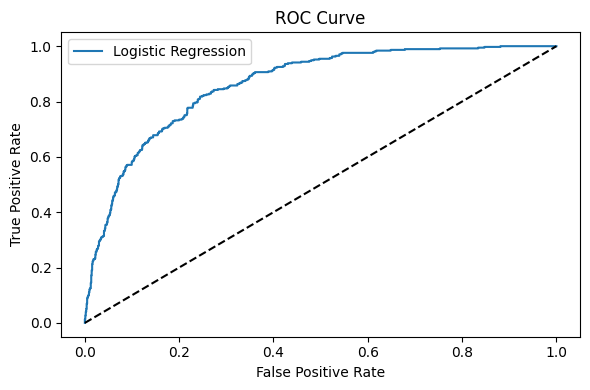

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, log_model.predict_proba(X_test_scaled)[:, 1])
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label='Logistic regression')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend()
plt.tight_layout()
plt.show()

Step 13: Loading to the Streamlit app

In [ ]:
import joblib
import os

os.makedirs("Customer_Churn_Prediction_Model", exist_ok=True)

# Saving the model and scaler
joblib.dump(log_model, "Customer_Churn_Prediction_Model/model.pkl")
joblib.dump(scaler, "Customer_Churn_Prediction_Model/scaler.pkl")

['model/scaler.pkl']